In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
# Using the pandas Excel class to raed the excel file load the excel file
data_set = pd.ExcelFile('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx')
sheet = 0  # Sheet counter

#Seperating the sheets and saving them as CSV file
# for sheet_name in data_set.sheet_names:
#     if sheet <= len(data_set.sheet_names):
#         print(f'Reading {data_set.sheet_names[sheet]} to a DataFrame....')
#         df = pd.read_excel(data_set, sheet_name)
#         if sheet == 1:
#             name = 'Existing employees2.csv'
#             df.to_csv(name)
#         elif sheet == 2:
#             name = 'Employees that left2.csv'
#             df.to_csv(name)
#         else:
#             pass
#         print()
#         print(
#             f'Saved {data_set.sheet_names[sheet]} as a CSV file with the name {name}')
#         sheet += 1


In [3]:
def existing_employee():
    existing_employees = pd.read_csv("Existing employees.csv")
    existing_employees_count = len(existing_employees["Emp ID"])
    left_company = []
    
    while existing_employees_count != 0:
        left_company.append("NO")
        existing_employees_count -= 1
    
    print("Before adding the new left_company column")
    print(existing_employees.head)
    existing_employees["left_company"] = left_company
    print("After adding the new left_company column")
    return existing_employees
    
existing_employees = existing_employee()
existing_employees.head()

Before adding the new left_company column
<bound method NDFrame.head of        Unnamed: 0  Emp ID  satisfaction_level  last_evaluation  \
0               0    2001                0.58             0.74   
1               1    2002                0.82             0.67   
2               2    2003                0.45             0.69   
3               3    2004                0.78             0.82   
4               4    2005                0.49             0.60   
...           ...     ...                 ...              ...   
11423       11423   14207                0.90             0.55   
11424       11424   14208                0.74             0.95   
11425       11425   14209                0.85             0.54   
11426       11426   14210                0.33             0.65   
11427       11427   14211                0.50             0.73   

       number_project  average_montly_hours  time_spend_company  \
0                   4                   215                   3   
1

,Unnamed: 0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left_company
0,0,2001,0.58,0.74,4,215,3,0,0,sales,low,NO
1,1,2002,0.82,0.67,2,202,3,0,0,sales,low,NO
2,2,2003,0.45,0.69,5,193,3,0,0,sales,low,NO
3,3,2004,0.78,0.82,5,247,3,0,0,sales,low,NO
4,4,2005,0.49,0.60,3,214,2,0,0,sales,low,NO


In [4]:
def left_employee():
    left_employees = pd.read_csv("Employees that left.csv")
    left_employees_count = len(left_employees["Emp ID"])
    left_company = []
    
    while left_employees_count != 0:
        left_company.append("YES")
        left_employees_count -= 1
        
    left_employees["left_company"] = left_company
    print(left_employees.head)
    return left_employees
employees_that_left = left_employee()
employees_that_left.head()

<bound method NDFrame.head of       Unnamed: 0  Emp ID  satisfaction_level  last_evaluation  number_project  \
0              0       1                0.38             0.53               2   
1              1       2                0.80             0.86               5   
2              2       3                0.11             0.88               7   
3              3       4                0.72             0.87               5   
4              4       5                0.37             0.52               2   
...          ...     ...                 ...              ...             ...   
3566        3566   14995                0.40             0.57               2   
3567        3567   14996                0.37             0.48               2   
3568        3568   14997                0.37             0.53               2   
3569        3569   14998                0.11             0.96               6   
3570        3570   14999                0.37             0.52               2  

,Unnamed: 0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left_company
0,0,1,0.38,0.53,2,157,3,0,0,sales,low,YES
1,1,2,0.80,0.86,5,262,6,0,0,sales,medium,YES
2,2,3,0.11,0.88,7,272,4,0,0,sales,medium,YES
3,3,4,0.72,0.87,5,223,5,0,0,sales,low,YES
4,4,5,0.37,0.52,2,159,3,0,0,sales,low,YES


In [5]:
frames = [existing_employees, employees_that_left]
total_employees = pd.concat(frames)
total_employees.to_csv("Total_employee_dataset.csv")
total_employees

,Unnamed: 0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left_company
0,0,2001,0.58,0.74,4,215,3,0,0,sales,low,NO
1,1,2002,0.82,0.67,2,202,3,0,0,sales,low,NO
2,2,2003,0.45,0.69,5,193,3,0,0,sales,low,NO
3,3,2004,0.78,0.82,5,247,3,0,0,sales,low,NO
4,4,2005,0.49,0.60,3,214,2,0,0,sales,low,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
3566,3566,14995,0.40,0.57,2,151,3,0,0,support,low,YES
3567,3567,14996,0.37,0.48,2,160,3,0,0,support,low,YES
3568,3568,14997,0.37,0.53,2,143,3,0,0,support,low,YES
3569,3569,14998,0.11,0.96,6,280,4,0,0,support,low,YES


In [6]:
#Selecting the feature and target dataset
X = total_employees[["satisfaction_level","last_evaluation","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years","dept","salary"]]
Y = total_employees["left_company"]

In [7]:
# Encoding categorical data AND Encoding independent variable
X = pd.get_dummies(X)
X.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.58,0.74,215,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.82,0.67,202,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.45,0.69,193,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.78,0.82,247,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.49,0.60,214,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [8]:

# Encoding dependent variable
le = LabelEncoder()
Y = le.fit_transform(Y)

In [9]:
# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

#Create the Random Forest model and fitting the data
classifier  = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [11]:
#Calculating and printing the model accuracy
print(f'The accurancy score is:{accuracy_score(Y_pred,Y_test)*100}%')

The accurancy score is:98.73333333333333%


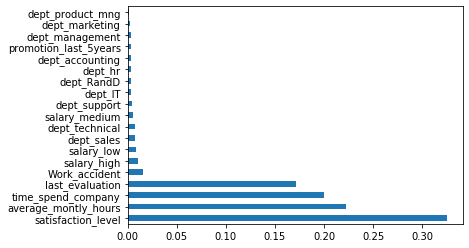

In [12]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [13]:
# Predictindg employee that is prone to leave

employee_prone_to_leave = pd.DataFrame(X_test)
employee_prone_to_leave["left_company"]  = Y_test
employee_prone_to_leave["predicted"] = Y_pred
employee_prone_to_leave["left_company"] = employee_prone_to_leave["left_company"].astype('str')
employee_prone_to_leave["left_company"] = employee_prone_to_leave["left_company"].replace('0','NO')
employee_prone_to_leave["left_company"] = employee_prone_to_leave["left_company"].replace('1','YES')
employee_prone_to_leave

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium,left_company,predicted
1670,0.49,0.92,176,3,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,NO,0
1950,0.85,0.85,247,6,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,YES,1
10233,0.44,0.37,219,2,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,NO,0
4719,0.37,0.41,146,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,NO,0
7003,0.59,1.00,275,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11275,0.62,0.76,198,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,NO,0
3828,0.91,0.62,158,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,NO,0
4645,0.73,0.94,213,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,NO,0
6069,0.74,0.64,229,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,NO,0


In [20]:
# Predicting employees that will leave the company
leaving = employee_prone_to_leave[(employee_prone_to_leave["predicted"] == 1) & (employee_prone_to_leave["left_company"] == "NO") ]
leaving.to_csv("Employees prone to leave.csv")
leaving


,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium,left_company,predicted
5782,0.38,0.51,120,3,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,NO,1
5862,0.68,1.00,205,4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,NO,1
1399,0.13,1.00,157,5,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,NO,1
8098,0.73,0.83,266,5,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,NO,1
4604,0.19,0.85,116,3,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,NO,1
2519,0.44,0.45,124,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,NO,1
4726,0.87,0.95,242,5,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,NO,1
2455,0.68,1.00,258,5,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,NO,1
5989,0.36,0.45,135,3,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,NO,1
